In [ ]:
#link for dataset
#

In [3]:
#In this project we'll use knn model for predicting heart disease

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [223]:
df=pd.read_csv('heart_disease_prediction.csv')

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
df.shape

(918, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [3]:
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [4]:
df['Sex'].value_counts(normalize=True)

M    0.78976
F    0.21024
Name: Sex, dtype: float64

In [5]:
#some observations from our data
#no missing value, 
#average age 53
#79% of population are male
#55% has a heart disease

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
categ_col=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

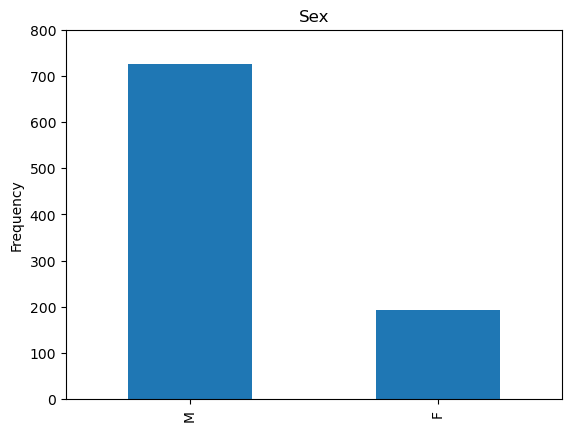

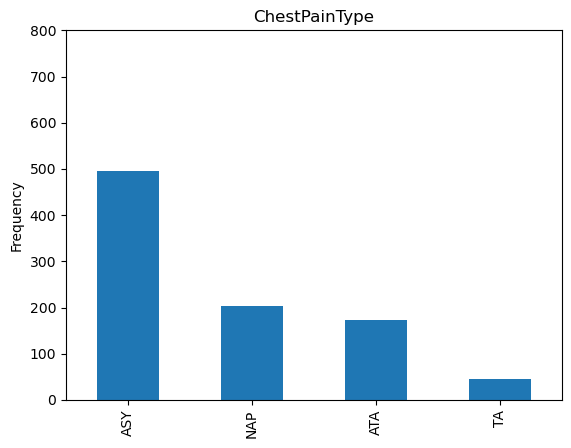

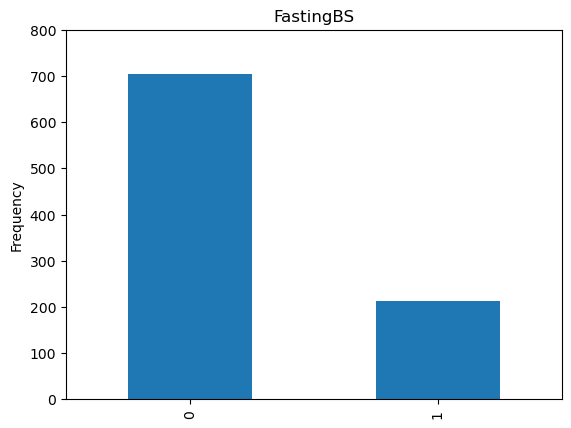

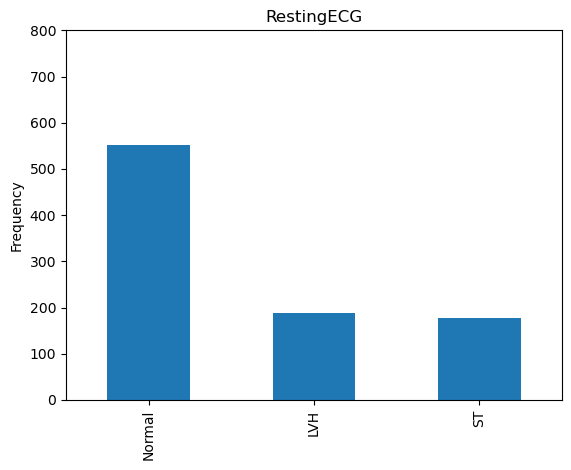

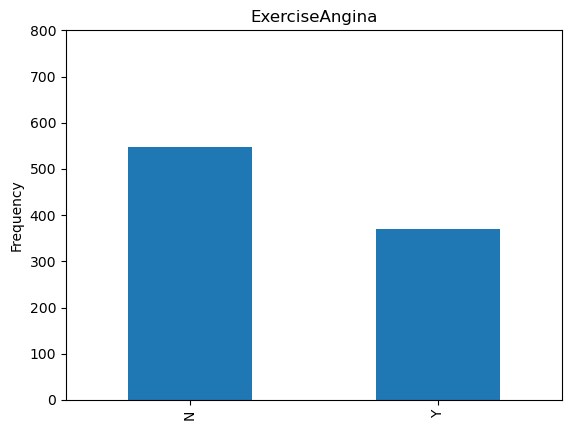

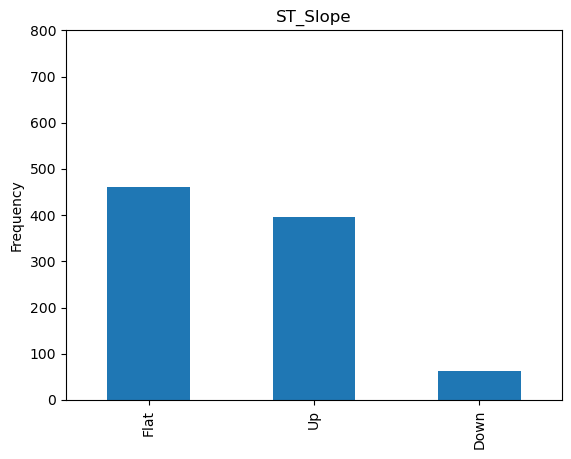

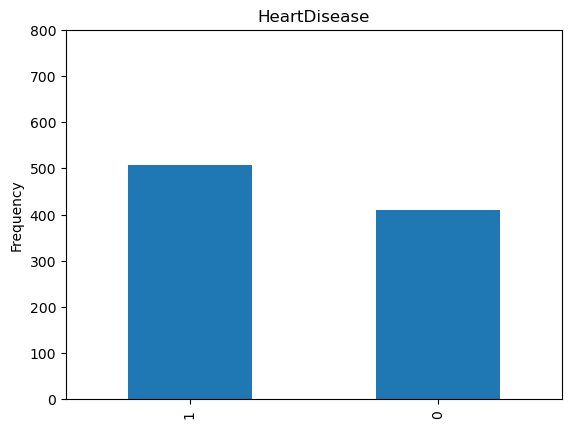

In [15]:
for c in categ_col:
  df[c].value_counts().plot(kind='bar')
  plt.ylim(0,800)
  plt.ylabel('Frequency')
  plt.title(c)
  plt.show()


In [51]:
categ_col_up=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

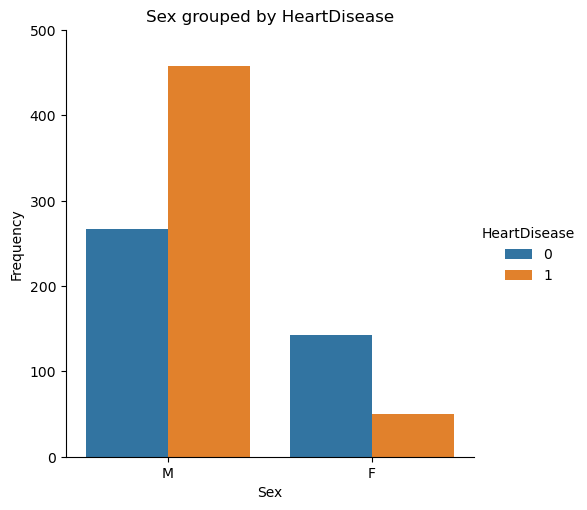

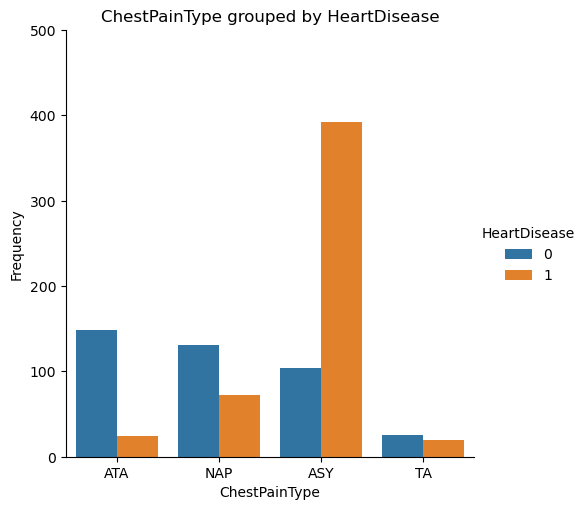

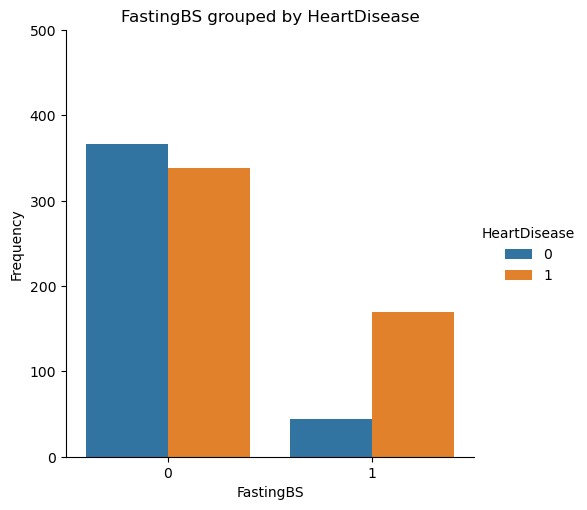

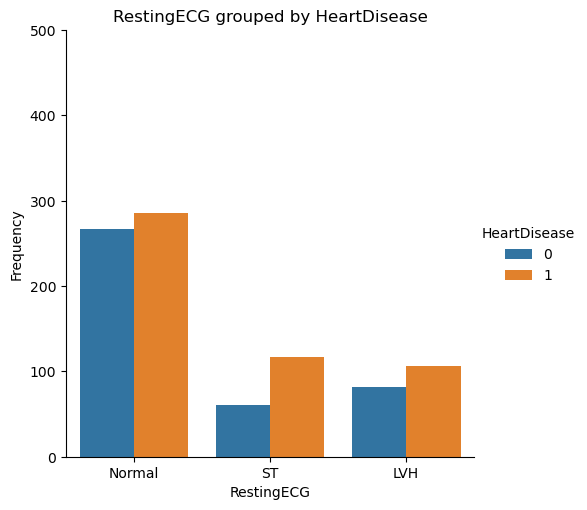

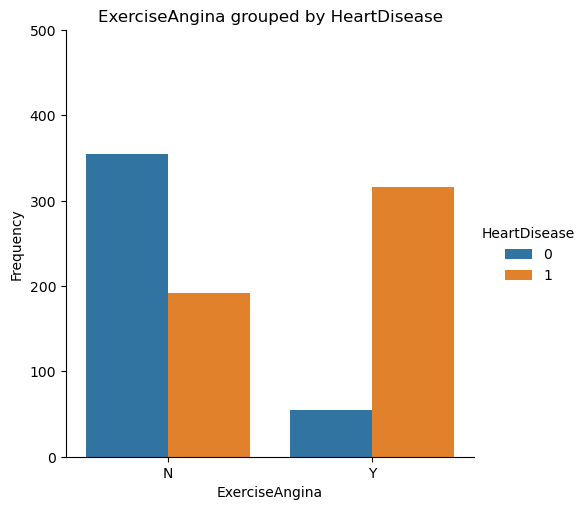

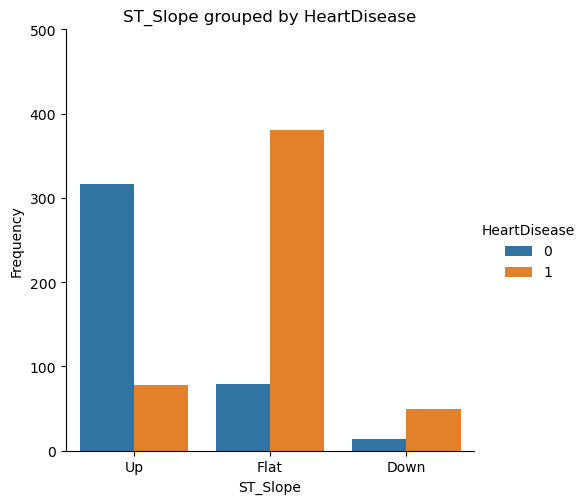

In [57]:
for c in categ_col_up:
  sns.catplot(data=df, x=c, hue='HeartDisease',  kind='count')
  #plt.legend()
  plt.ylim(0,500)
  plt.ylabel('Frequency')
  plt.title(c + ' grouped by HeartDisease')
  plt.show()


In [63]:
M_over50=df[(df['Sex']=='M') & (df['Age']>50)]['HeartDisease'].value_counts(normalize=True)

Text(0.5, 0, 'Heart Disease')

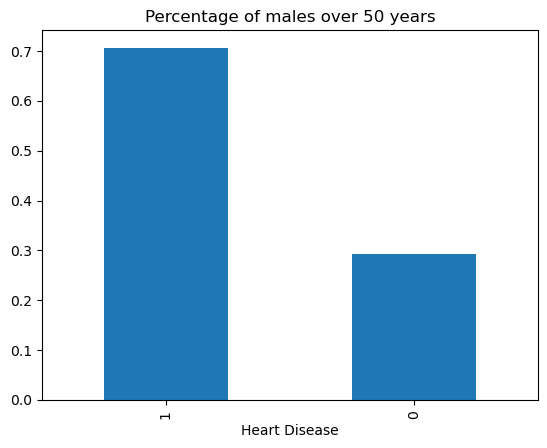

In [67]:
M_over50.plot(kind='bar')
plt.title('Percentage of males over 50 years')
plt.xlabel('Heart Disease')

In [71]:
HD_per_age=df[df['HeartDisease']==1]['Age']

In [76]:
HD_per_age.describe()

count    508.000000
mean      55.899606
std        8.727056
min       31.000000
25%       51.000000
50%       57.000000
75%       62.000000
max       77.000000
Name: Age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff7dd6187c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff7dd618d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff7dd618610>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff7dd619300>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff7dd6195d0>],
 'means': []}

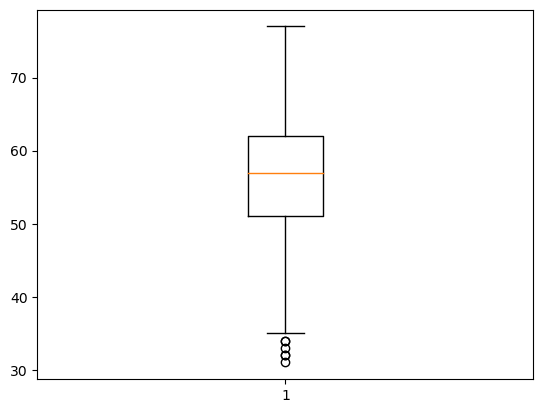

In [82]:
plt.boxplot(HD_per_age)
#plt.yticks(range(30,80,1))

In [89]:
len(df[df['RestingBP']==0])

1

In [90]:
#for this columns we can remove it

In [224]:
df=df[df['RestingBP']!=0]

In [96]:
df.shape

(917, 12)

In [97]:
len(df[df['Cholesterol']==0])

171

In [98]:
#in thos case we couldn't remove all these rows, we handle it in other ways

In [101]:
df_col_nul=df[df['Cholesterol']==0]

In [102]:
df_col_nul.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,171.000000,171.000000,171.0,171.000000,171.000000,171.000000,171.000000
mean,56.245614,130.438596,0.0,0.520468,121.795322,0.821637,0.883041
std,8.641107,20.767637,0.0,0.501048,24.103922,1.041407,0.322315
min,32.000000,80.000000,0.0,0.000000,60.000000,-2.600000,0.000000
25%,51.500000,115.000000,0.0,0.000000,108.000000,0.000000,1.000000
50%,58.000000,130.000000,0.0,1.000000,120.000000,0.700000,1.000000
75%,62.000000,140.000000,0.0,1.000000,138.000000,1.500000,1.000000
max,74.000000,200.000000,0.0,1.000000,182.000000,3.700000,1.000000


In [103]:
#we grouped by multiple columns

In [225]:
df[df['Cholesterol']!=0].groupby(['Sex','ChestPainType', 'HeartDisease']).median()['Cholesterol']

Sex  ChestPainType  HeartDisease
F    ASY            0               248.0
                    1               274.0
     ATA            0               244.0
                    1               299.0
     NAP            0               220.0
                    1               263.0
     TA             0               237.0
M    ASY            0               228.0
                    1               243.0
     ATA            0               227.5
                    1               265.0
     NAP            0               227.5
                    1               229.0
     TA             0               213.0
                    1               264.0
Name: Cholesterol, dtype: float64

In [113]:
df[df['Cholesterol']!=0].groupby(['Sex', 'HeartDisease']).median()['Cholesterol']

Sex  HeartDisease
F    0               238.5
     1               275.0
M    0               227.0
     1               243.0
Name: Cholesterol, dtype: float64

In [114]:
#we choose this 4 categories and fill the median values to the same categorie in the df with cholesterol null

In [244]:
new_df=df.copy()

In [245]:
med_f0=238.5
med_f1=275
med_m0=227
med_m1=243
new_df.loc[(new_df['HeartDisease']==0) & (new_df['Cholesterol']==0) &(df['Sex']=='M'),['Cholesterol'] ]=227
new_df.loc[(new_df['HeartDisease']==1) & (new_df['Cholesterol']==0) &(df['Sex']=='M'),['Cholesterol'] ]=243
new_df.loc[(new_df['HeartDisease']==0) & (new_df['Cholesterol']==0) &(df['Sex']=='F'),['Cholesterol'] ]=238.5
new_df.loc[(new_df['HeartDisease']==1) & (new_df['Cholesterol']==0) &(df['Sex']=='F'),['Cholesterol'] ]=275

In [228]:
new_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.342966,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.505136,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,243.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,269.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [188]:
corr=new_df.corr()

In [189]:
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263084,0.051002,0.198170,-0.382280,0.258563,0.282012
RestingBP,0.263084,1.000000,0.085666,0.067823,-0.109693,0.174252,0.117990
Cholesterol,0.051002,0.085666,1.000000,0.048916,-0.013473,0.053822,0.102912
FastingBS,0.198170,0.067823,0.048916,1.000000,-0.131067,0.053062,0.267994
MaxHR,-0.382280,-0.109693,-0.013473,-0.131067,1.000000,-0.161213,-0.401410
Oldpeak,0.258563,0.174252,0.053822,0.053062,-0.161213,1.000000,0.403638
HeartDisease,0.282012,0.117990,0.102912,0.267994,-0.401410,0.403638,1.000000


In [190]:
#we see that MaxHR and Oldpeak have a great correlation

In [246]:
new_df=pd.get_dummies(data=new_df, columns=['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

In [230]:
new_df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.263084,0.051002,0.198170,-0.382280,0.258563,0.282012,0.055670,-0.218113,-0.011681,0.032083,0.216017,-0.230793,0.136903,0.216017,0.185499,-0.258027
RestingBP,0.263084,1.000000,0.085666,0.067823,-0.109693,0.174252,0.117990,0.009427,-0.051374,-0.027536,0.049464,0.153064,-0.113759,0.089156,0.153064,0.110171,-0.105969
Cholesterol,0.051002,0.085666,1.000000,0.048916,-0.013473,0.053822,0.102912,-0.119127,-0.015941,-0.066638,-0.043701,0.076814,-0.038330,-0.030371,0.076814,0.095787,-0.092247
FastingBS,0.198170,0.067823,0.048916,1.000000,-0.131067,0.053062,0.267994,0.120424,-0.140844,-0.038201,0.026752,0.059988,-0.092588,0.126853,0.059988,0.107683,-0.162346
MaxHR,-0.382280,-0.109693,-0.013473,-0.131067,1.000000,-0.161213,-0.401410,-0.189668,0.254214,0.133411,0.100235,-0.370023,0.023181,-0.157561,-0.370023,-0.343641,0.384339
Oldpeak,0.258563,0.174252,0.053822,0.053062,-0.161213,1.000000,0.403638,0.105444,-0.261903,-0.107615,0.032382,0.409494,-0.117293,0.056283,0.409494,0.282874,-0.450299
HeartDisease,0.282012,0.117990,0.102912,0.267994,-0.401410,0.403638,1.000000,0.305118,-0.401680,-0.215311,-0.054591,0.495490,-0.092452,0.103067,0.495490,0.553700,-0.621843
Sex_M,0.055670,0.009427,-0.119127,0.120424,-0.189668,0.105444,0.305118,1.000000,-0.161294,-0.067682,-0.003903,0.191226,-0.011098,0.064009,0.191226,0.115596,-0.150537
ChestPainType_ATA,-0.218113,-0.051374,-0.015941,-0.140844,0.254214,-0.261903,-0.401680,-0.161294,1.000000,-0.256306,-0.110817,-0.300947,0.108422,-0.046381,-0.300947,-0.304346,0.357324
ChestPainType_NAP,-0.011681,-0.027536,-0.066638,-0.038201,0.133411,-0.107615,-0.215311,-0.067682,-0.256306,1.000000,-0.122150,-0.164722,0.003352,-0.041317,-0.164722,-0.074256,0.095585


<AxesSubplot:>

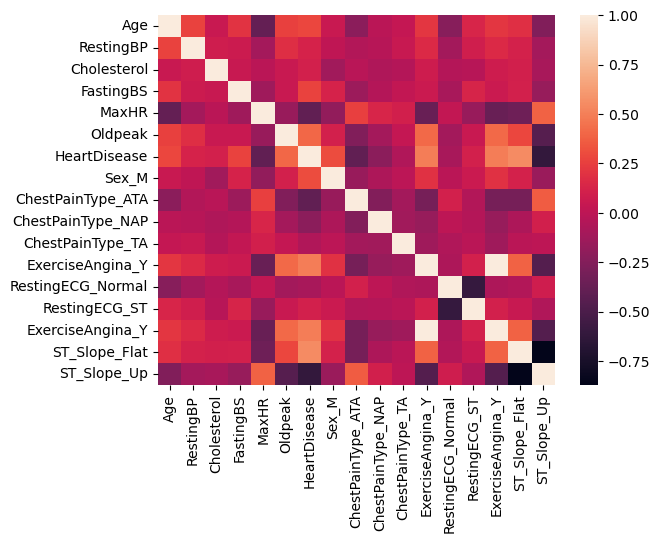

In [199]:
sns.heatmap(new_df.corr())

In [247]:
new_df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease         1.000000
ST_Slope_Flat        0.553700
ExerciseAngina_Y     0.495490
Oldpeak              0.403638
Sex_M                0.305118
Age                  0.282012
FastingBS            0.267994
RestingBP            0.117990
RestingECG_ST        0.103067
Cholesterol          0.102912
ChestPainType_TA    -0.054591
RestingECG_Normal   -0.092452
ChestPainType_NAP   -0.215311
MaxHR               -0.401410
ChestPainType_ATA   -0.401680
ST_Slope_Up         -0.621843
Name: HeartDisease, dtype: float64

In [214]:
#new_df.drop('ExerciseAngina_Y', axis=1, inplace=True)

In [248]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                917 non-null    int64  
 1   RestingBP          917 non-null    int64  
 2   Cholesterol        917 non-null    float64
 3   FastingBS          917 non-null    int64  
 4   MaxHR              917 non-null    int64  
 5   Oldpeak            917 non-null    float64
 6   HeartDisease       917 non-null    int64  
 7   Sex_M              917 non-null    uint8  
 8   ChestPainType_ATA  917 non-null    uint8  
 9   ChestPainType_NAP  917 non-null    uint8  
 10  ChestPainType_TA   917 non-null    uint8  
 11  RestingECG_Normal  917 non-null    uint8  
 12  RestingECG_ST      917 non-null    uint8  
 13  ExerciseAngina_Y   917 non-null    uint8  
 14  ST_Slope_Flat      917 non-null    uint8  
 15  ST_Slope_Up        917 non-null    uint8  
dtypes: float64(2), int64(5), u

In [251]:
df_select=new_df[['Oldpeak', 'MaxHR', 'ChestPainType_ATA', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']]               

In [252]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Oldpeak            917 non-null    float64
 1   MaxHR              917 non-null    int64  
 2   ChestPainType_ATA  917 non-null    uint8  
 3   Sex_M              917 non-null    uint8  
 4   ExerciseAngina_Y   917 non-null    uint8  
 5   ST_Slope_Flat      917 non-null    uint8  
 6   ST_Slope_Up        917 non-null    uint8  
 7   HeartDisease       917 non-null    int64  
dtypes: float64(1), int64(2), uint8(5)
memory usage: 33.1 KB


In [254]:
X=df_select[['Oldpeak', 'MaxHR', 'ChestPainType_ATA', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']]
y=df_select['HeartDisease']

In [256]:
X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=0.2, random_state=22)

In [258]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(733, 7) (184, 7) (733,) (184,)


In [259]:
feature=['Oldpeak', 'MaxHR', 'ChestPainType_ATA', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

In [269]:
import numpy as np

In [274]:
for f in feature:
    model=KNeighborsClassifier(10)
    model.fit(np.array(X_train[f]).reshape(-1,1),y_train)
    y_pred=model.predict(np.array(X_test[f]).reshape(-1,1))
    acc=accuracy_score(y_test, y_pred)
    print(f, acc)
    

Oldpeak 0.6793478260869565
MaxHR 0.625
ChestPainType_ATA 0.42391304347826086
Sex_M 0.42391304347826086
ExerciseAngina_Y 0.7228260869565217
ST_Slope_Flat 0.7010869565217391
ST_Slope_Up 0.7771739130434783


In [276]:
#ST_Slope Up and Flat have the best model, also ExerciceAngina with 0.72 accuracy
#Sex_M and ChestPainType clearly underperforming our model with accuracy less than 0.5

In [277]:
#we change the knn parameters and see if there is a big difference

In [292]:
for f in feature:
    model=KNeighborsClassifier(3)
    model.fit(np.array(X_train[f]).reshape(-1,1),y_train)
    y_pred=model.predict(np.array(X_test[f]).reshape(-1,1))
    acc=accuracy_score(y_test, y_pred)
    print(f, acc)

Oldpeak 0.6684782608695652
MaxHR 0.6195652173913043
ChestPainType_ATA 0.7010869565217391
Sex_M 0.6467391304347826
ExerciseAngina_Y 0.7228260869565217
ST_Slope_Flat 0.7010869565217391
ST_Slope_Up 0.42391304347826086


In [285]:
len(X_train)**(1/2)

27.073972741361768

In [293]:
#let's scale our ata with minmaxscaler

In [294]:
from sklearn.preprocessing import MinMaxScaler

In [295]:
scaler=MinMaxScaler()
X_train_S=scaler.fit_transform(X_train)
X_test_S=scaler.transform(X_test)

In [306]:
for k in range(5,100):
    knn=KNeighborsClassifier(k)
    knn.fit(X_train_S, y_train)
    y_pred=knn.predict(X_test_S)
    print(k, accuracy_score(y_test, y_pred))

5 0.7989130434782609
6 0.8097826086956522
7 0.8043478260869565
8 0.7934782608695652
9 0.8097826086956522
10 0.8043478260869565
11 0.8152173913043478
12 0.8152173913043478
13 0.8206521739130435
14 0.8206521739130435
15 0.8152173913043478
16 0.8152173913043478
17 0.8260869565217391
18 0.8260869565217391
19 0.8260869565217391
20 0.8369565217391305
21 0.8260869565217391
22 0.8315217391304348
23 0.8315217391304348
24 0.8315217391304348
25 0.8315217391304348
26 0.8315217391304348
27 0.8315217391304348
28 0.8260869565217391
29 0.8369565217391305
30 0.8315217391304348
31 0.8260869565217391
32 0.8260869565217391
33 0.8152173913043478
34 0.8097826086956522
35 0.8043478260869565
36 0.8043478260869565
37 0.8043478260869565
38 0.8043478260869565
39 0.8043478260869565
40 0.8043478260869565
41 0.8097826086956522
42 0.8097826086956522
43 0.8206521739130435
44 0.8206521739130435
45 0.8097826086956522
46 0.8152173913043478
47 0.8043478260869565
48 0.8043478260869565
49 0.8043478260869565
50 0.7934782608

In [308]:
#we have a 83,6% with k=29

In [309]:
#n this section we try tuning hyperparameter by using GridSearchCV method

In [310]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=11)

In [311]:
X_train_scaled=scaler.transform(X_train)

In [314]:
param={'n_neighbors':list(range(5,30)), 'weights':['uniform', 'distance'] }

In [315]:
knn=KNeighborsClassifier()

In [316]:
grid=GridSearchCV(knn, param, cv=10, scoring='accuracy')

In [317]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [319]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8634950018511661
{'n_neighbors': 21, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=21)


In [327]:
pd.DataFrame(grid.cv_results_).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      50 non-null     float64
 1   std_fit_time       50 non-null     float64
 2   mean_score_time    50 non-null     float64
 3   std_score_time     50 non-null     float64
 4   param_n_neighbors  50 non-null     object 
 5   param_weights      50 non-null     object 
 6   params             50 non-null     object 
 7   split0_test_score  50 non-null     float64
 8   split1_test_score  50 non-null     float64
 9   split2_test_score  50 non-null     float64
 10  split3_test_score  50 non-null     float64
 11  split4_test_score  50 non-null     float64
 12  split5_test_score  50 non-null     float64
 13  split6_test_score  50 non-null     float64
 14  split7_test_score  50 non-null     float64
 15  split8_test_score  50 non-null     float64
 16  split9_test_score  50 non-nu

In [328]:
#we perform our model the best model given by gridsearch has accuracy 86%

In [329]:
#we finalize ou project by evaluating on test set

In [330]:
X_test_scaled=scaler.transform(X_test)

In [331]:
y_pred=grid.best_estimator_.predict(X_test_scaled)

In [332]:
acc_test=accuracy_score(y_test, y_pred)
print(acc)

0.782608695652174


In [333]:
acc_train=accuracy_score(y_train, grid.best_estimator_.predict(X_train_scaled))
print(acc_train)

0.8622100954979536


In [ ]:
# the accuracy for the train set is higher than that of the test